# lg segmentor2 test with 2 training volumes

Training volumes are cropped from original 256 to 128 cube sizes, to run this faster

In [1]:
import leopardgecko.segmentor2 as lgs2
import numpy as np

In [2]:
import logging
#logging.basicConfig(level=logging.INFO)
logging.basicConfig(level=logging.INFO,
                    format="%(asctime)s — %(name)s — %(levelname)s — %(funcName)s:%(lineno)d — %(message)s",
        )
import tifffile

In [3]:
data_labels_fn = ("./test_data/TS_0005_crop.tif", "./test_data/TS_0005_ribos_membr_crop.tif")

datafn0, labelfn0 =data_labels_fn

data = tifffile.imread(datafn0)
labels = tifffile.imread(labelfn0)

# traindatas=[data, data]
# trainlabels=[labels, labels]

# 2 non-intersecting volumes
data_128crop_orig = data[:128,:128,:128]
label_128crop_orig = labels[:128,:128,:128]

data_128crop_other = data[128:,:128,:128]
label_128crop_other = labels[128:,:128,:128]

# traindatas=[data_128crop_orig, data_128crop_orig]
# trainlabels=[label_128crop_orig, label_128crop_orig]
traindatas=[data_128crop_orig, data_128crop_other]
trainlabels=[label_128crop_orig, label_128crop_other]

In [4]:
lgs2.nn1_train_epochs=2 # debug low number
lgs2.nn2_train_epochs=2

In [5]:
#lgs2.quick_new_and_train_one_unet_model_per_axis(traindatas, trainlabels)

lgs2.quick_new_and_train_2unets_z_xy_models(traindatas, trainlabels)

2024-07-04 15:22:22,661 — root — INFO — quick_new_and_train_2unets_z_xy_models:1879 — quick_new_and_train_one_unet_model_per_axis
2024-07-04 15:22:22,662 — root — INFO — update_nn1_models_from_generators:174 — update_NN1_models_from_generators()
2024-07-04 15:22:22,662 — root — INFO — update_nn1_models_from_generators:179 — 2 NN1 models to be created
2024-07-04 15:22:22,663 — root — INFO — create_nn1_ptmodel_from_class_generator:126 — create_nn1_ptmodel_from_class_generator()
2024-07-04 15:22:23,509 — root — INFO — create_nn1_ptmodel_from_class_generator:126 — create_nn1_ptmodel_from_class_generator()
2024-07-04 15:22:24,076 — root — INFO — update_nn2_model_from_generator:980 — update_NN2_model_from_generator()
2024-07-04 15:22:24,076 — root — INFO — create_nn2_ptmodel_from_class_generator:947 — create_nn2_ptmodel_from_class_generator()
2024-07-04 15:22:24,076 — root — INFO — create_nn2_ptmodel_from_class_generator:955 — hid_layers_num_list: [10, 10]
2024-07-04 15:22:24,076 — root — IN

KeyboardInterrupt: 

Save model

In [6]:
import datetime
DATE=str(datetime.date.today())
TIME=f"{datetime.datetime.now().hour:02d}{datetime.datetime.now().minute:02d}"
fname_stem=f"{DATE}_{TIME}"
model_fn = f"{fname_stem}_model.lgsegm2"
model_fn

'2024-07-04_1329_model.lgsegm2'

In [7]:
lgs2.save_lgsegm2_model(model_fn)

## see training progress

In [8]:
lgs2.last_train_nn1_progress

{0: {'test_results': [{'avg_loss': 0.41324334286858944,
    'avg_metric': 0.2312978641483842,
    'test_metrics': [0.052926208823919296,
     0.005630308296531439,
     4.184100566018145e-10,
     1.0,
     7.575757798861105e-10,
     7.849293437445226e-11,
     0.007968127727508545,
     3.5087718841531057e-10,
     0.0016184503911063075,
     0.5926428437232971,
     3.289473693435241e-10,
     0.26469212770462036,
     0.2870855927467346,
     1.0,
     0.14421120285987854,
     1.0,
     0.10695187002420425,
     0.3305742144584656,
     1.5797788077698272e-10,
     0.3707076907157898,
     0.18887892365455627,
     0.036557283252477646,
     3.3444816360805874e-10,
     0.09688331931829453,
     6.581545638345565e-12,
     0.5264163017272949],
    'test_losses': [0.6746283769607544,
     0.721333384513855,
     0.33455371856689453,
     0.0010914802551269531,
     0.3340137004852295,
     0.007575949188321829,
     0.6782886981964111,
     0.0014742414932698011,
     0.43089890480

In [9]:
for k,v in lgs2.last_train_nn1_progress.items():
    print(k,v)

0 {'test_results': [{'avg_loss': 0.41324334286858944, 'avg_metric': 0.2312978641483842, 'test_metrics': [0.052926208823919296, 0.005630308296531439, 4.184100566018145e-10, 1.0, 7.575757798861105e-10, 7.849293437445226e-11, 0.007968127727508545, 3.5087718841531057e-10, 0.0016184503911063075, 0.5926428437232971, 3.289473693435241e-10, 0.26469212770462036, 0.2870855927467346, 1.0, 0.14421120285987854, 1.0, 0.10695187002420425, 0.3305742144584656, 1.5797788077698272e-10, 0.3707076907157898, 0.18887892365455627, 0.036557283252477646, 3.3444816360805874e-10, 0.09688331931829453, 6.581545638345565e-12, 0.5264163017272949], 'test_losses': [0.6746283769607544, 0.721333384513855, 0.33455371856689453, 0.0010914802551269531, 0.3340137004852295, 0.007575949188321829, 0.6782886981964111, 0.0014742414932698011, 0.43089890480041504, 0.55351322889328, 0.0015793442726135254, 0.5196719169616699, 0.7303671836853027, 4.907449238089612e-06, 0.7066493034362793, 4.490216724661877e-06, 0.6562725901603699, 0.90

In [10]:
for k,v in lgs2.last_train_nn1_progress.items():
    print(k,v['test_results'])
    print(len(v['test_results']))

0 [{'avg_loss': 0.41324334286858944, 'avg_metric': 0.2312978641483842, 'test_metrics': [0.052926208823919296, 0.005630308296531439, 4.184100566018145e-10, 1.0, 7.575757798861105e-10, 7.849293437445226e-11, 0.007968127727508545, 3.5087718841531057e-10, 0.0016184503911063075, 0.5926428437232971, 3.289473693435241e-10, 0.26469212770462036, 0.2870855927467346, 1.0, 0.14421120285987854, 1.0, 0.10695187002420425, 0.3305742144584656, 1.5797788077698272e-10, 0.3707076907157898, 0.18887892365455627, 0.036557283252477646, 3.3444816360805874e-10, 0.09688331931829453, 6.581545638345565e-12, 0.5264163017272949], 'test_losses': [0.6746283769607544, 0.721333384513855, 0.33455371856689453, 0.0010914802551269531, 0.3340137004852295, 0.007575949188321829, 0.6782886981964111, 0.0014742414932698011, 0.43089890480041504, 0.55351322889328, 0.0015793442726135254, 0.5196719169616699, 0.7303671836853027, 4.907449238089612e-06, 0.7066493034362793, 4.490216724661877e-06, 0.6562725901603699, 0.9005502462387085, 0

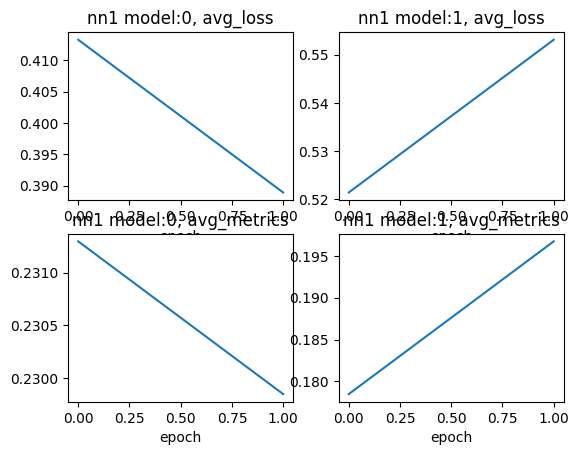

In [11]:
import matplotlib.pyplot as plt

nmodels = len(lgs2.last_train_nn1_progress.keys())

fig, axs= plt.subplots(2,2)
for k,v in lgs2.last_train_nn1_progress.items():

    avg_loss = [ t['avg_loss'] for t in v['test_results']]
    avg_metrics = [ t['avg_metric'] for t in v['test_results']]
    axs[0,k].plot( avg_loss)
    axs[0,k].set_title(f"nn1 model:{k}, avg_loss")
    axs[0,k].set_xlabel("epoch")
    axs[1,k].plot(avg_metrics)
    axs[1,k].set_title(f"nn1 model:{k}, avg_metrics")
    axs[1,k].set_xlabel("epoch")

In [12]:
lgs2.last_train_nn2_progress

{'test_results': [{'avg_loss': 1.2645525336265564,
   'avg_metric': 0.08995593711733818,
   'test_metrics': [0.0869140625, 0.09299781173467636],
   'test_losses': [1.265866756439209, 1.2632383108139038]},
  {'avg_loss': 1.2062814831733704,
   'avg_metric': 0.30089156329631805,
   'test_metrics': [0.302001953125, 0.2997811734676361],
   'test_losses': [1.2027161121368408, 1.2098468542099]}]}

Text(0.5, 0, 'epoch')

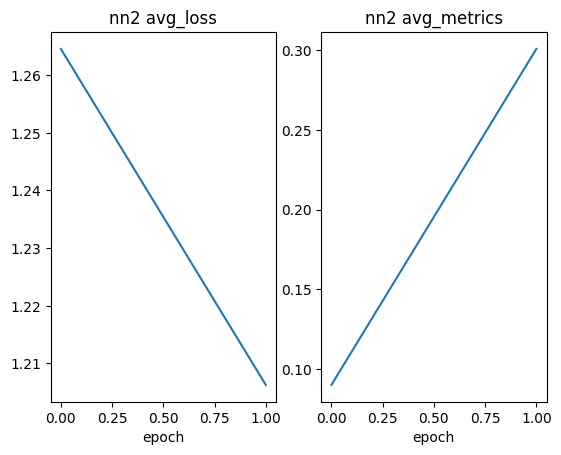

In [13]:
import matplotlib.pyplot as plt

nmodels = len(lgs2.last_train_nn1_progress.keys())
fig, axs= plt.subplots(1,2)

v=lgs2.last_train_nn2_progress

avg_loss = [ t['avg_loss'] for t in v['test_results']]
avg_metrics = [ t['avg_metric'] for t in v['test_results']]
axs[0].plot( avg_loss)
axs[0].set_title(f"nn2 avg_loss")
axs[0].set_xlabel("epoch")
axs[1].plot(avg_metrics)
axs[1].set_title(f"nn2 avg_metrics")
axs[1].set_xlabel("epoch")

In [ ]:
assert 1==0

In [ ]:
%reset -f

# Load model and predict

Recommended restart kernel

## setup

In [ ]:
import numpy as np
import leopardgecko.segmentor2 as lgs2
import tifffile
import napari

import logging
#logging.basicConfig(level=logging.INFO)
logging.basicConfig(level=logging.INFO,
                    format="%(asctime)s — %(name)s — %(levelname)s — %(funcName)s:%(lineno)d — %(message)s",
                    force=True
                    )

In [ ]:
#lgs2.load_lgsegm2_model("2024-06-19_0931_model.lgsegm2")
lgs2.load_lgsegm2_model("2024-06-20_1744_model.lgsegm2")

In [ ]:
val_data = tifffile.imread("test_data\TS_0005_crop_val.tif")
val_labels_gnd = tifffile.imread("test_data\TS_0005_ribos_membr_crop_val.tif")

val_data_l = [val_data]

In [ ]:
#Normalise
datavols_norm_list0 = lgs2.normalise_volumes(val_data_l)

In [ ]:
# NV=napari.Viewer()
# NV.add_image(val_data)
# NV.add_image(datavols_norm_list0[0], name="normalized")
# NV.add_labels(val_labels_gnd, name="ground truth lbl")

OK

In [ ]:
slice = datavols_norm_list0[0][128,:,:] #in case it is needed, and example slice

In [ ]:
lgs2.torch_device_str_nn2 = "cuda:0"

Working through function by function in segmentor.py to find what is going wrong

## Check single slice prediction

In [ ]:
lgs2.NN1_models[0]

In [ ]:
lgs2.nn1_axes_to_models_indices

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(slice)

In [ ]:
model = lgs2.NN1_models[0]
model.eval()

In [ ]:
import torch
import torch.nn
x = torch.unsqueeze( torch.unsqueeze( torch.from_numpy(slice), dim=0) , dim=0).float().to("cuda:0")
X=model(x)
SM_func = torch.nn.Softmax(dim=1)
pred_probs_slice = SM_func(X)

In [ ]:
pred_probs_slice.shape

In [ ]:
plt.imshow(pred_probs_slice.detach().cpu().numpy()[0,0,:,:])

OK

## Check nn1_predict_slices_along_axis_1

In [ ]:
probs0, lbls0 = lgs2.predict_nn1_slices_along_axis_1(datavols_norm_list0[0], axis=0)

In [ ]:
NV=napari.Viewer()
NV.add_image(val_data)
NV.add_image(probs0, name="pred probs")

OK

## Check NN1_predict

In [ ]:
import tempfile
from pathlib import Path
tempdir_pred= tempfile.TemporaryDirectory()
path_out_results = Path(tempdir_pred.name)
path_out_results

In [ ]:
res_pd = lgs2.predict_nn1(datavols_norm_list0, path_out_results)

Check results in temporary folder

In [ ]:
# cleanup
del(tempdir_pred)

## Check full `predict()`

In [ ]:
pred_res = lgs2.predict(val_data_l)

In [ ]:
import napari
NV=napari.Viewer()
NV.add_image(val_data)
NV.add_labels(val_labels_gnd, name="lbls gnd")
NV.add_labels(pred_res[0], name="pred lbls")

OK

# Check nn2_train

with random arrays

In [1]:
import leopardgecko.segmentor2 as lgs2
import numpy as np

import logging
#logging.basicConfig(level=logging.INFO)
logging.basicConfig(level=logging.INFO,
                    format="%(asctime)s — %(name)s — %(levelname)s — %(funcName)s:%(lineno)d — %(message)s",
        )

lgs2.nn2_train_epochs=2

In [2]:
# global nn1_models_class_generator
# global nn1_axes_to_models_indices
# global nn2_MLP_model_class_generator
# global nn1_train_epochs


nn1_models_class_generator= [lgs2.nn1_dict_gen_default]

nn1_axes_to_models_indices = [0,0,0]

lgs2.nn2_MLP_model_class_generator= lgs2.nn2_MLP_model_class_generator_default
# Default 3 unet models, one per axis. 3 classes
# NN2, MLP 10,10

#nn1_train_epochs= 10

lgs2.update_nn1_models_from_generators()
lgs2.update_nn2_model_from_generator()

2024-07-04 15:25:13,009 — root — INFO — update_nn1_models_from_generators:174 — update_NN1_models_from_generators()
2024-07-04 15:25:13,009 — root — INFO — update_nn2_model_from_generator:980 — update_NN2_model_from_generator()
2024-07-04 15:25:13,009 — root — INFO — create_nn2_ptmodel_from_class_generator:947 — create_nn2_ptmodel_from_class_generator()
2024-07-04 15:25:13,009 — root — INFO — create_nn2_ptmodel_from_class_generator:955 — hid_layers_num_list: [10, 10]


Create random arrays for training

Make it very imbalanced

In [3]:
import random

# data = np.random.random((2,12,3,32,32,32))
# labels_0 = np.random.randint(0,255, (2, 32,32,32))

# labels_1 = np.where( labels_0>220, 1, 0).astype(np.uint8)
# labels_2 = np.where( labels_0>240, 1, 0).astype(np.uint8)
# labels = labels_1+labels_2

w=128
data = np.random.random((2,12,3,w,w,w))
labels_0 = np.random.randint(0,255, (2, w,w,w))

labels = np.where( labels_0>218, 1, 0).astype(np.uint8)

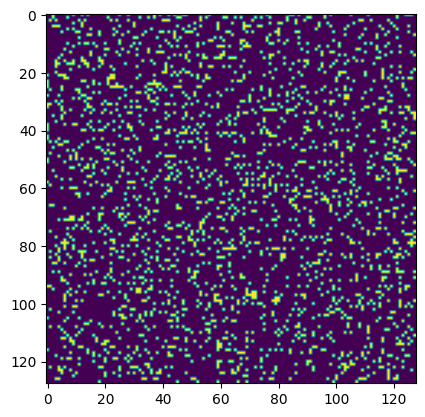

In [4]:
import matplotlib.pyplot as plt
plt.imshow(labels[0,10,:,:])

OK

Now attempt to train the nn2

In [5]:
lgs2.train_nn2_class_balanced(data,labels)

2024-07-04 15:25:14,324 — root — INFO — train_nn2_class_balanced:1342 — train_nn2_class_balanced()
2024-07-04 15:25:14,326 — root — INFO — train_nn2_class_balanced:1343 — data_all_np5d.shape:(2, 12, 3, 128, 128, 128), len(trainlabels_list): 2
2024-07-04 15:25:14,327 — root — INFO — train_nn2_class_balanced:1344 — nn2_ntrain:65536
2024-07-04 15:25:14,333 — root — INFO — train_nn2_class_balanced:1355 — nclasses estimated from max: 2, nvoxels_per_class:[3601684, 592620]
2024-07-04 15:25:14,334 — root — INFO — train_nn2_class_balanced:1358 — Adjusting number of elements.
2024-07-04 15:25:14,335 — root — INFO — train_nn2_class_balanced:1368 — Some thrs_vox_per_class [225105  37038] are smaller than max_items_per_class 40960
2024-07-04 15:25:14,336 — root — INFO — train_nn2_class_balanced:1371 — Adjusting max_items_per_class to 37035
2024-07-04 15:25:14,336 — root — INFO — train_nn2_class_balanced:1378 — max_items_per_class: 37035, ntotal (adjusted):74070
2024-07-04 15:25:14,338 — root — INF